In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("housing train.csv",usecols = ['GarageQual','FireplaceQu','SalePrice'])
df.sample(12)

,FireplaceQu,GarageQual,SalePrice
1212,NaN,TA,113000
1227,NaN,TA,147000
632,TA,TA,82500
147,Gd,TA,222500
1453,NaN,NaN,84500
894,NaN,TA,118858
1435,Gd,TA,174000
916,NaN,TA,35311
98,NaN,Fa,83000
1180,NaN,TA,250000


In [3]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'number of houses')

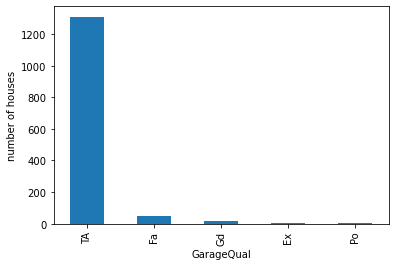

In [4]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("GarageQual")
plt.ylabel('number of houses')

<AxesSubplot:>

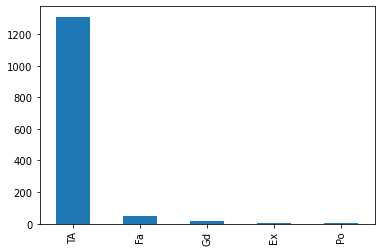

In [5]:
df['GarageQual'].value_counts().plot(kind='bar')

In [6]:
df['GarageQual'].mode()

0    TA
dtype: object

Text(0.5, 1.0, 'GarageQual')

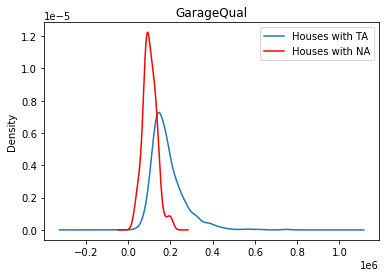

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind = 'kde',ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde' ,ax=ax,color='Red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Houses with TA','Houses with NA']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual')

In [8]:
temp = df[df['GarageQual'] == 'TA']['SalePrice'] # storig whole i temp variable

In [9]:
df['GarageQual'].fillna('TA',inplace=True)#filling missing values with TA

<AxesSubplot:>

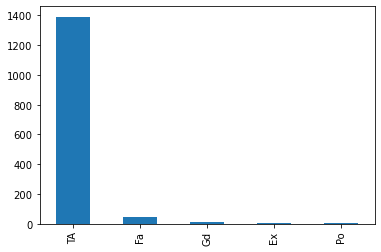

In [10]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

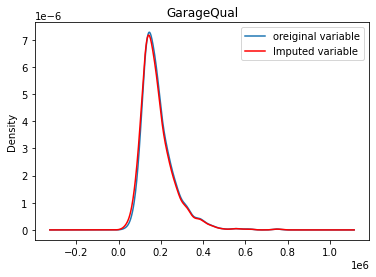

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)

#distribution of the variable after impution
df[df['GarageQual']== 'TA']['SalePrice'].plot(kind='kde' ,ax=ax,color='Red')

lines,labels = ax.get_legend_handles_labels()
labels = ['oreiginal variable','Imputed variable']
ax.legend(lines,labels,loc='best')

#add title
plt.title('GarageQual')

<AxesSubplot:>

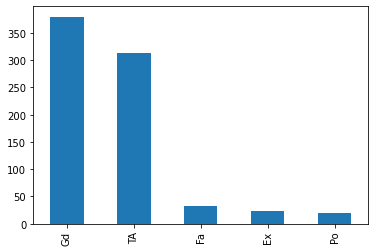

In [12]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [13]:
df['FireplaceQu'].mode()

0    Gd
dtype: object

Text(0.5, 1.0, 'FireplaceQu')

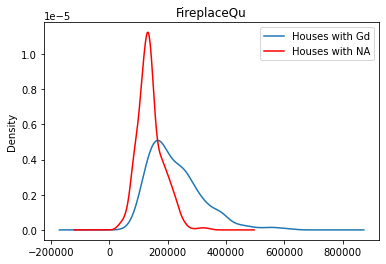

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind = 'kde',ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde' ,ax=ax,color='Red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd','Houses with NA']
ax.legend(lines,labels,loc='best')

plt.title('FireplaceQu')

In [15]:
temp = df[df['FireplaceQu'] == 'Gd']['SalePrice'] # storig whole i temp variable

In [16]:
df['FireplaceQu'].fillna('Gd',inplace=True)#filling missing values with TA

<AxesSubplot:>

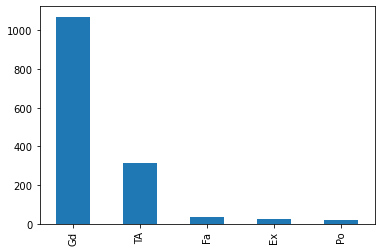

In [17]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

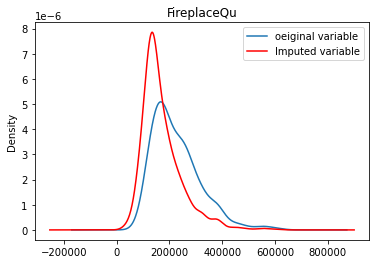

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)

#distribution of the variable after impution
df[df['FireplaceQu']== 'Gd']['SalePrice'].plot(kind='kde' ,ax=ax,color='Red')

lines,labels = ax.get_legend_handles_labels()
labels = ['oeiginal variable','Imputed variable']
ax.legend(lines,labels,loc='best')

#add title
plt.title('FireplaceQu')

In [19]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2,random_state=44)

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [21]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [22]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)